# Project 6: Visualizing Monetary Policy

monetayr policy = control & influecne of availabiltiy of money & credit.

Fig is the whole image
Ax refers to the subplots, if any...

plot_stacked_lines

In [1]:
from matplotlib.backends.backend_pdf import PdfPages
from datlib.plots import *
#import datlib.FRED as fred

In [2]:
## dunder -- double underscore, leading and trailing
#print(fred.__dict__)

### .resample
using the resample mehthod to make sure all returned data is in the same granularity.
string values: "D", "W", "M", "Q", "Y", "2D", "3Y"

Also after .resample().XXX where .XXX is mean(), first(), last(), median()...

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), frequency = "M"):
    isDF = False
    for name, code in data_codes.items():
        if isDF == True:
            df = web.DataReader(data_codes, 'fred', start, end).resample(frequency).mean()
            df.rename(columns={code:name}, inplace=True)
        else:
            df[name] = web.DataReader(code, 'fred', start, end).resample(freq).mean()
    return df

def bil_to_mil(series):
    return series * 10 ** 3
    

In [4]:
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

In [25]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "CURRCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               "New Privately-Owned Housing Units Started: Total Units":"HOUST",
               "New Privately-Owned Housing Units Started: Single-Family Units": "HOUST1F",
               "New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units":"HOUST2F"
               }

In [26]:
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. 
# Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates alternating days

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end, 
                  freq= "M")

# # Write dataframe to file
data.to_csv('../data/project6FedData.csv')

In [27]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),New Privately-Owned Housing Units Started: Total Units,New Privately-Owned Housing Units Started: Single-Family Units,New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units
DATE,,,,,,,,,,,,,,,,,,,,,
2002-01-31,653800.0,635.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,1.729677,NaN,45416.20,33.731,1698.0,1318.0,69.0
2002-02-28,654600.0,635.884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,1.739643,NaN,45947.00,33.239,1829.0,1501.0,44.0
2002-03-31,659000.0,639.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,1.730000,NaN,42567.25,31.209,1642.0,1292.0,45.0
2002-04-30,663400.0,643.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,1.753000,NaN,42146.25,31.222,1592.0,1277.0,28.0
2002-05-31,668600.0,648.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,1.751290,NaN,41926.20,31.104,1764.0,1402.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,6042100.0,2154.819,7775974.00,7614925.00,7207246.25,4986900.00,2347.0,2217999.25,0.00,759.75,...,5255878.75,NaN,0.25,0.069000,0.100000,NaN,NaN,1514.0,1061.0,14.0
2021-05-31,6041900.0,2167.945,7866893.25,7709974.25,7291913.75,5063447.75,2347.0,2226119.00,11.75,642.50,...,5142879.50,NaN,0.25,0.058065,0.100000,NaN,NaN,1594.0,1098.0,10.0
2021-06-30,6027100.0,2178.900,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.00,516.00,...,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN,1657.0,1161.0,11.0


In [7]:
# Read csv from file to pandas dataframe...
data = pd.read_csv('../data/project6FedData.csv')

## Reset index to Date ... reading in from CSV seems to lose the index data?
# stock_close.set_index('Date', inplace=True)

In [8]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]

for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [9]:
def plot_lines(df,
              title = "",
              lw = 1,   #linewidth
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,   # pdf pages
              save_fig = False,
              legend_columns = 2):
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis=0, how="all").plot.line(
            linewidth = lw,
            secondary_y = secondary_y,
            legend = legend,
            ax = ax)
    
    ax.set_title(title)
    ax.legend(ncol = legend_columns)
    
    # remove ticklines
    ax.tick_params(axis="x", 
                   rotation = 90)
    ax.tick_params("both", 
                   length=0, 
                   which="both")
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals])
    
    #Format file name
    characters = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in characters:
        filename = filename.replace(char,"")
        
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        # bbox_inches = "tight" rfers to formatting...

        plt.savefig("plots/" + filename[:50] + "lines.png",
                   bbox_inches = "tight")
        
        if pp!= None: pp.savefig(fig, bbox_inches = "tight")
    

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_9740/4055892860.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


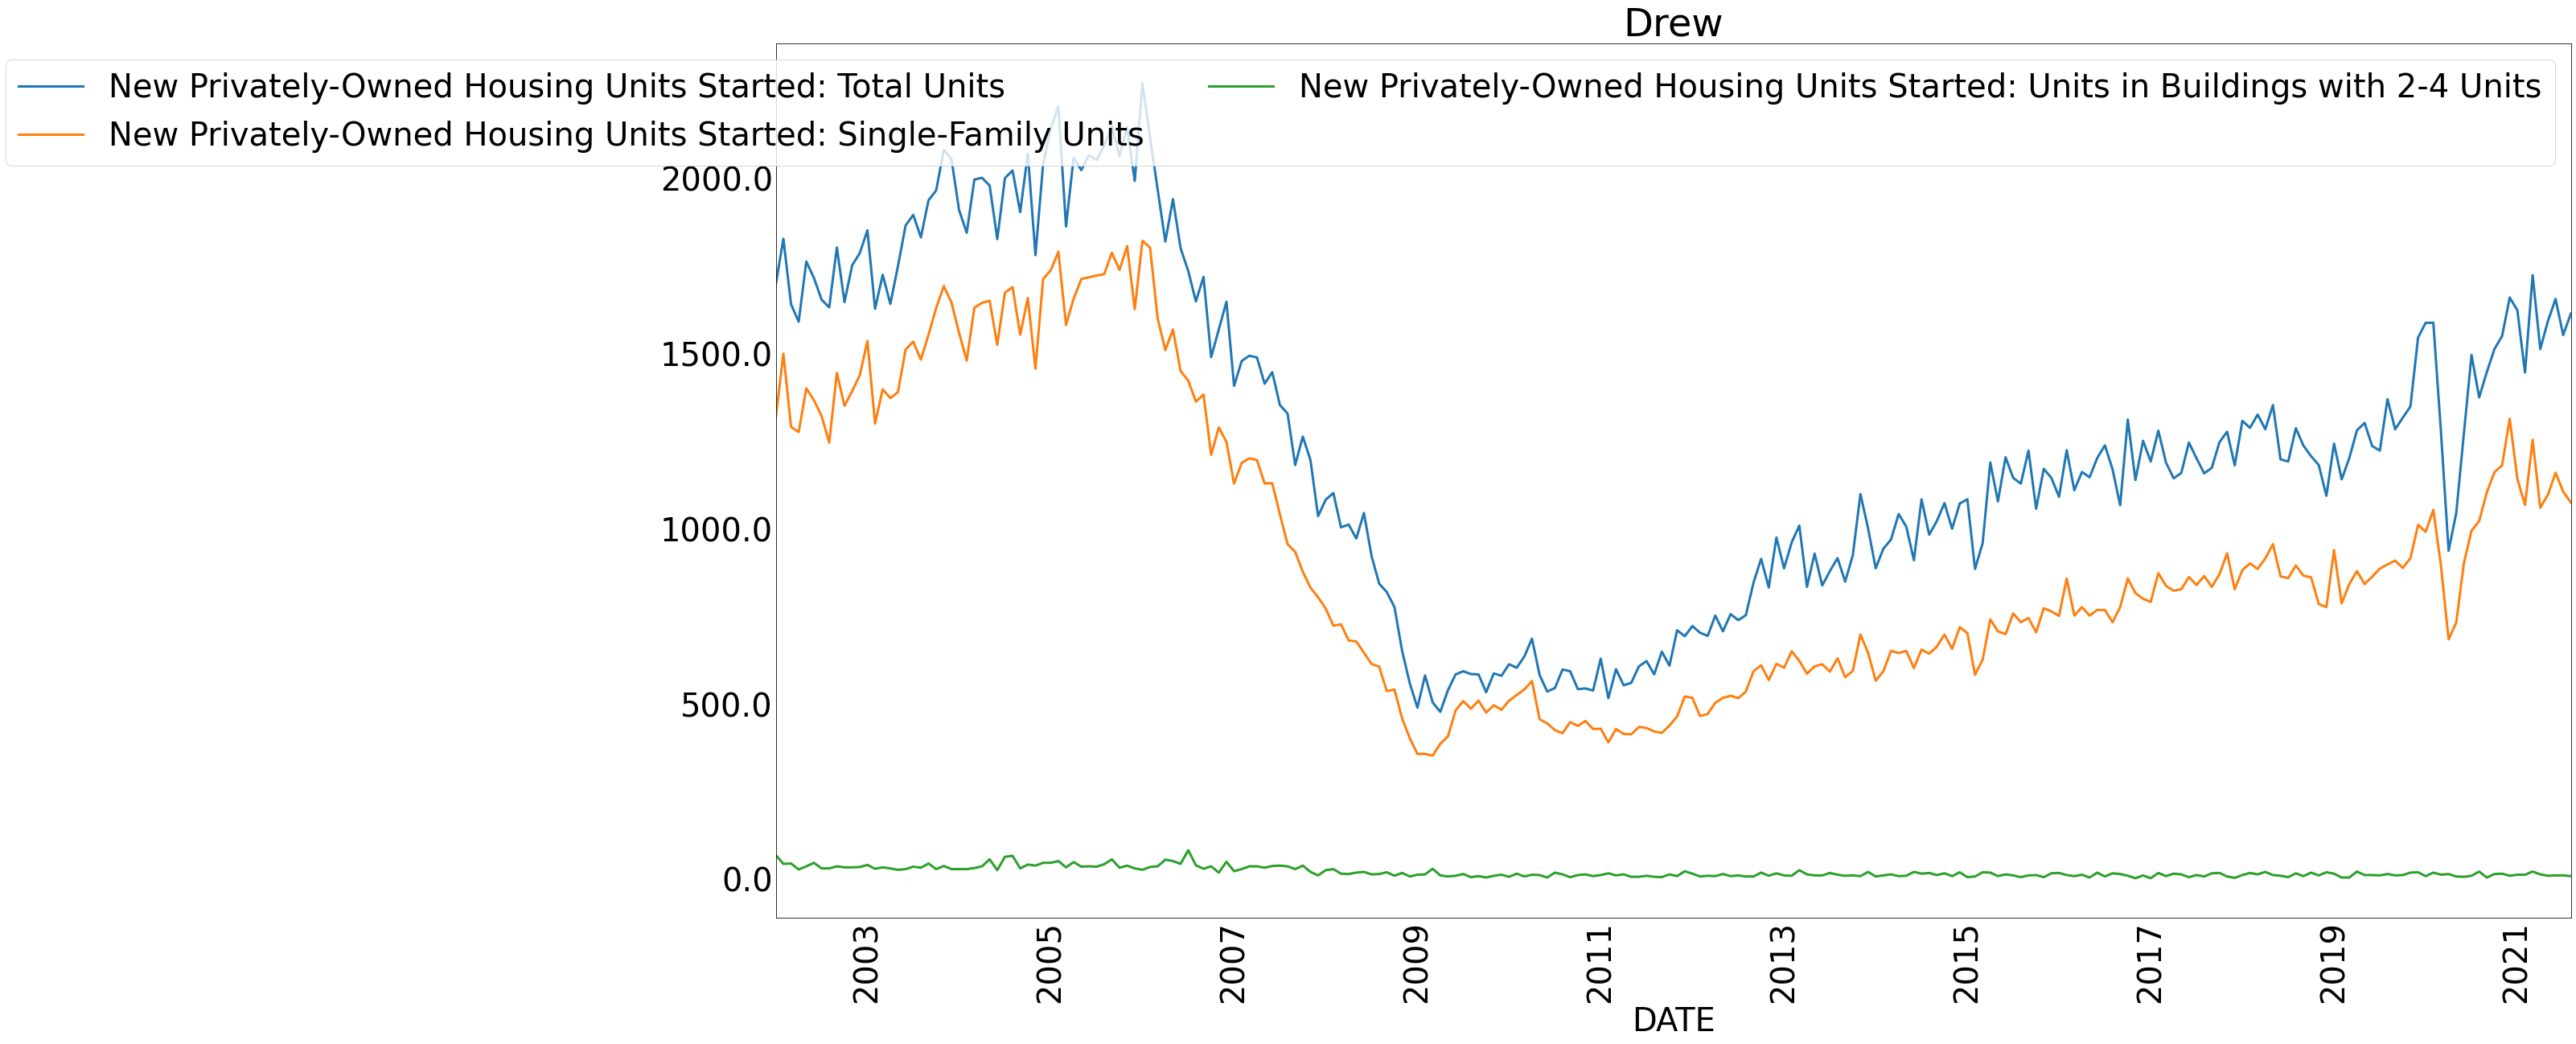

In [29]:
plt.rcParams.update({"font.size":40})

params = ['New Privately-Owned Housing Units Started: Total Units',
          'New Privately-Owned Housing Units Started: Single-Family Units',
          'New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units']

plot_df = data[params]

plot_lines(
    plot_df,
    lw =3,
    title = "Drew"
)

## Stacked Area Plots

change the 'pp' reference to 'pdf'


In [11]:
def plot_stacked_lines(df, 
                       plot_vars, 
                       lw = 2, 
                       figsize = (40,20), 
                       pdf = None, 
                       total_var = False,
                       legend_columns = 2):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, 
                            linewidth = lw,
                            ax = ax)
    # change y vals from mil to tril
    
    if total_var != False:
        df[total_var].plot.line(
            linewidth = lw, 
            ax = ax, 
            c = "k",
            label = total_var, 
            ls = "--")
        
    ax.legend(loc=2, ncol = legend_columns)

In [ ]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
                "Balance Sheet: Excess Reserves ($ Mil)",
                "Balance Sheet: Required Reserves ($ Mil)"]

plot_stacked_lines(
    data, 
    reserve_vars, 
    lw = 3, 
    total_var = "Base: Total ($ Mil)"
)

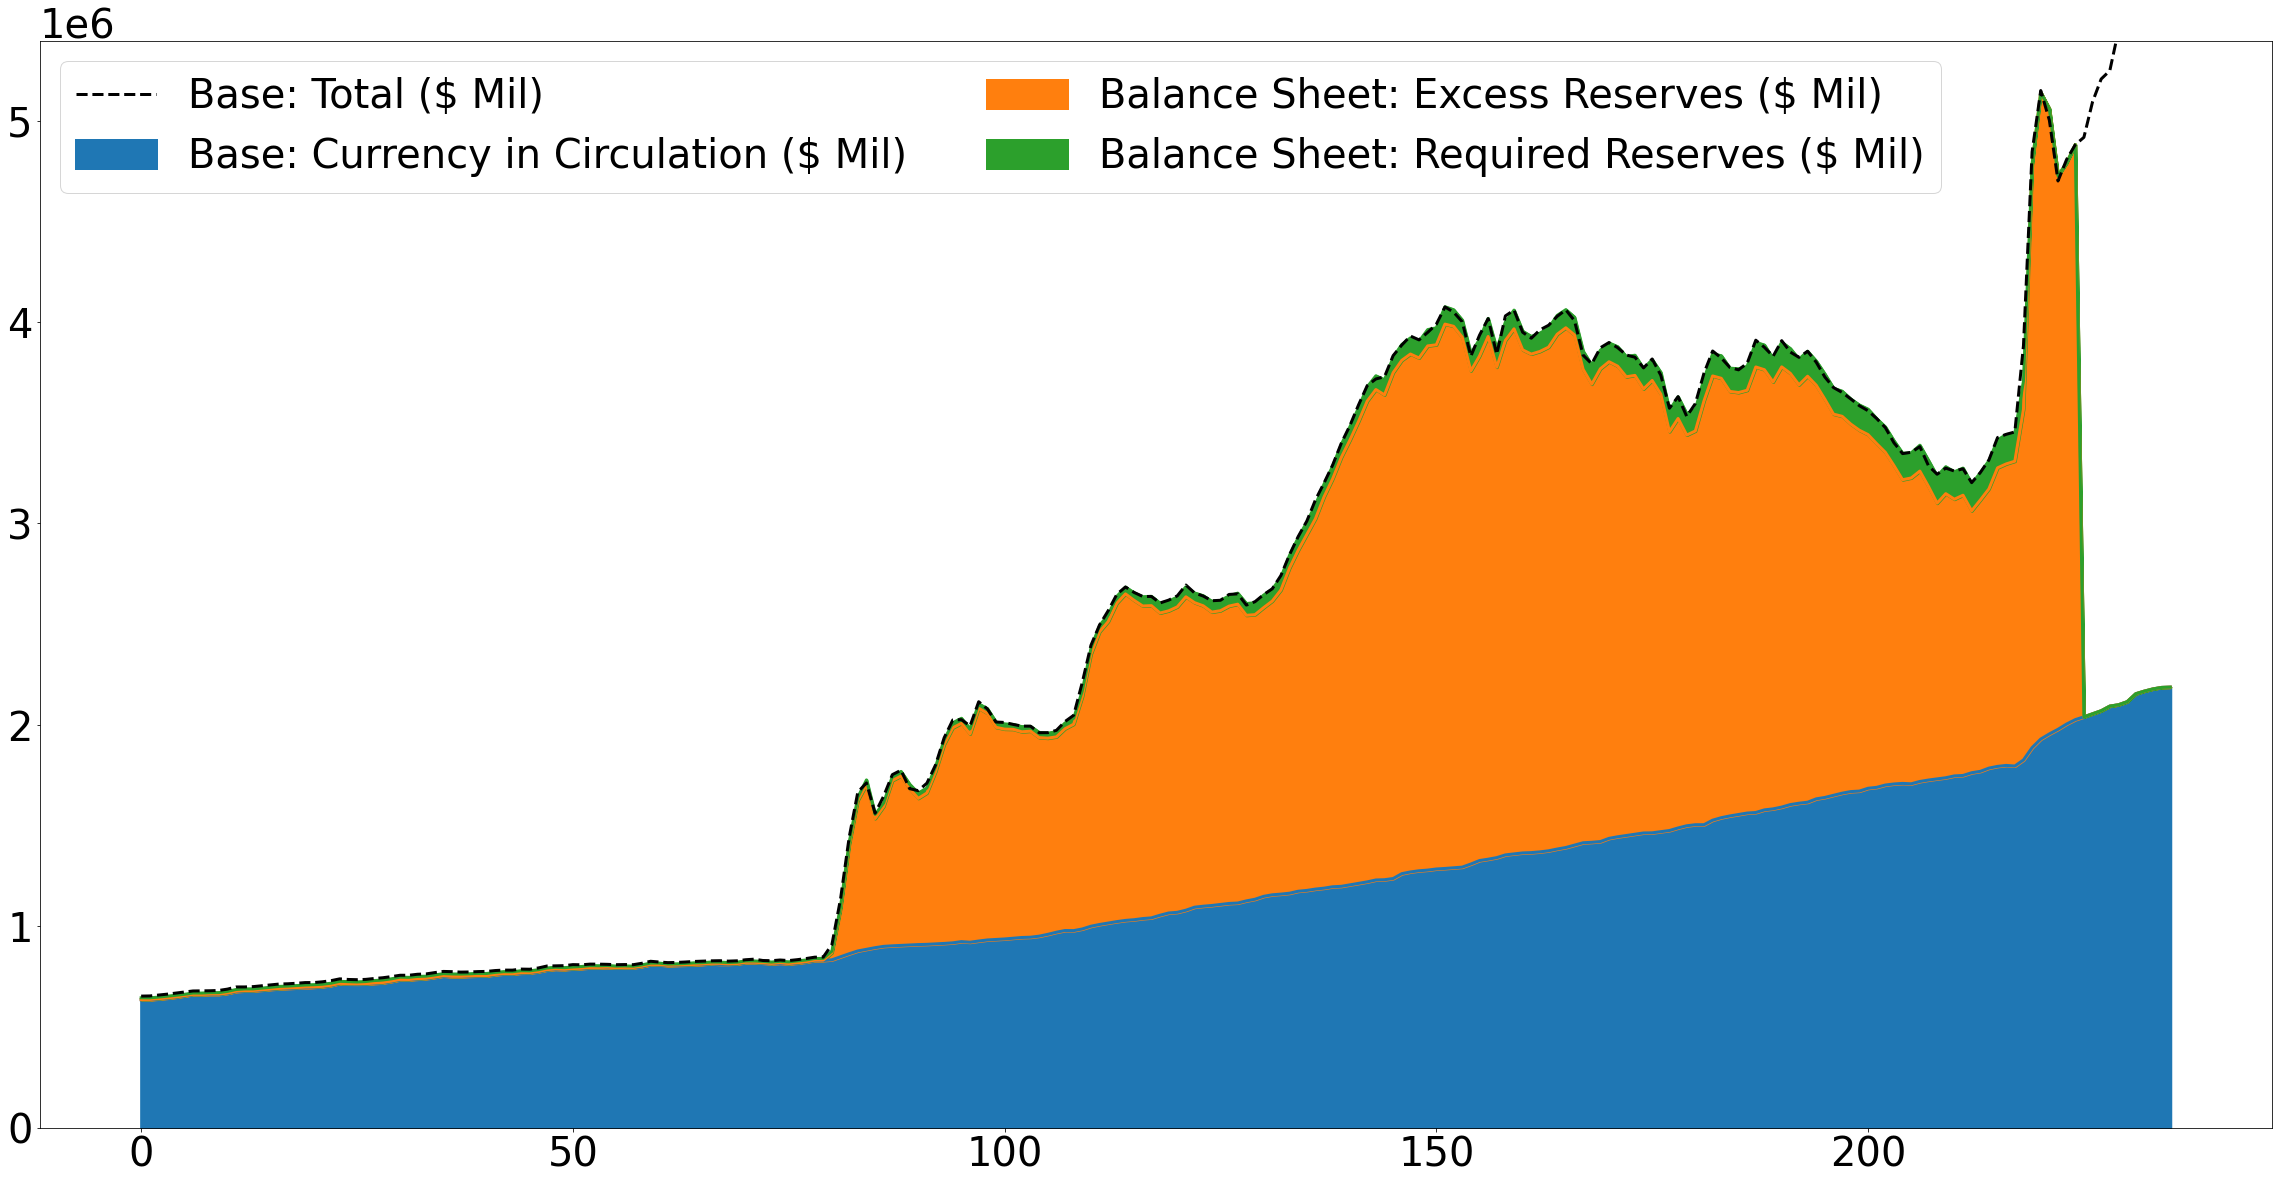

In [12]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
                "Balance Sheet: Excess Reserves ($ Mil)",
                "Balance Sheet: Required Reserves ($ Mil)"]

plot_stacked_lines(
    data, 
    reserve_vars, 
    lw = 3, 
    total_var = "Base: Total ($ Mil)"
)

## Assets held by the Federal Reserve

Federal agency debt securities are from Fannie, Freddie and FHLB.


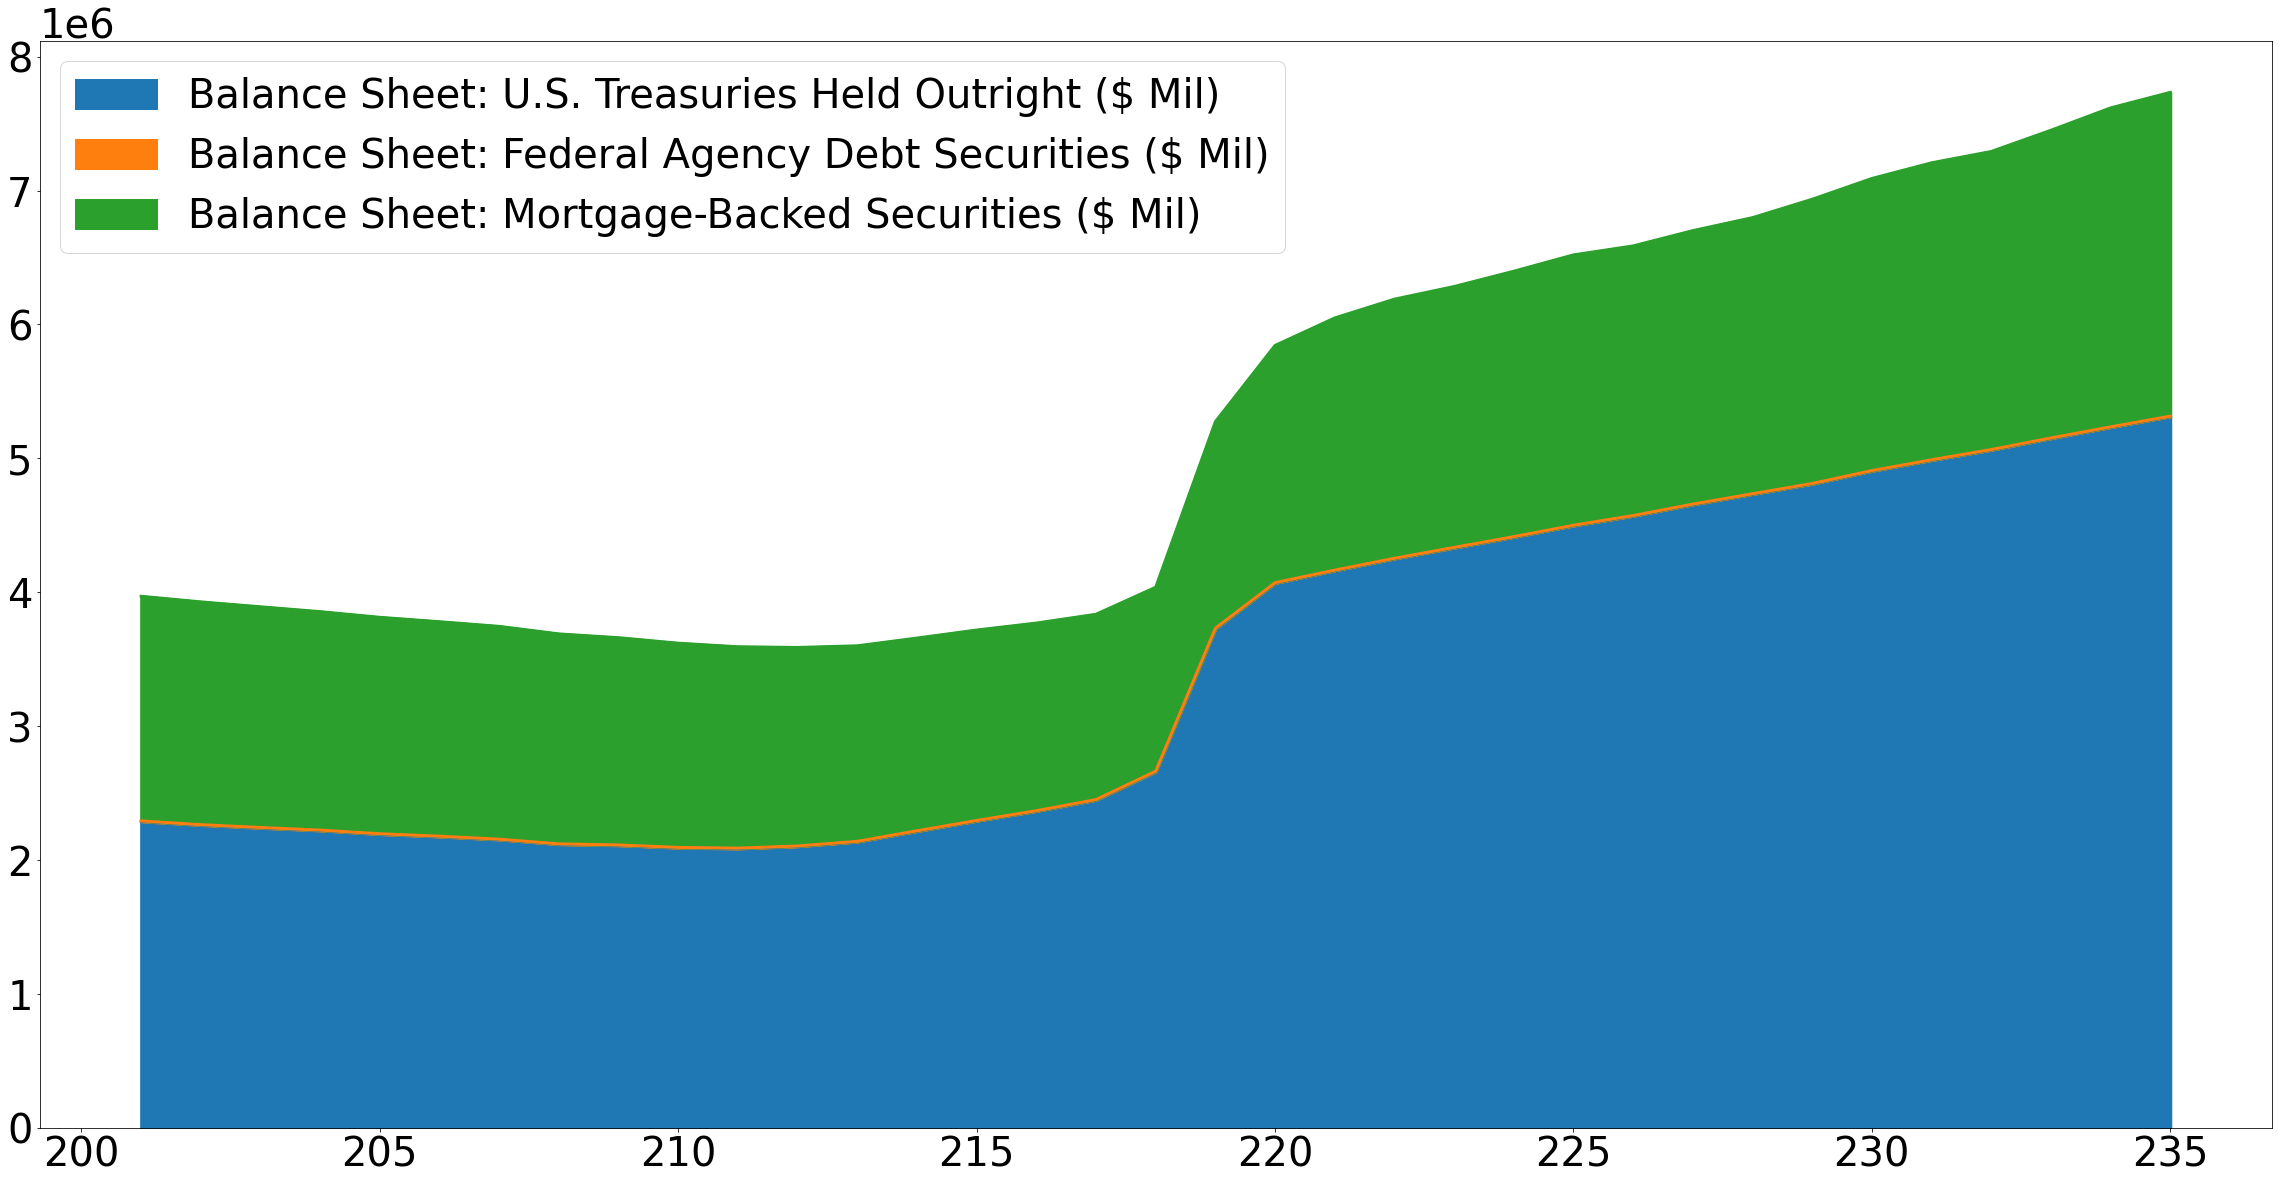

In [13]:
varAssets = [
    "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
    "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
    "Balance Sheet: Mortgage-Backed Securities ($ Mil)"
]

plot_stacked_lines(
    data.loc["2003":], 
    varAssets, 
    lw = 3,
    pdf = True,
    legend_columns = 1
)



## SKIP SCATTER PLOTS

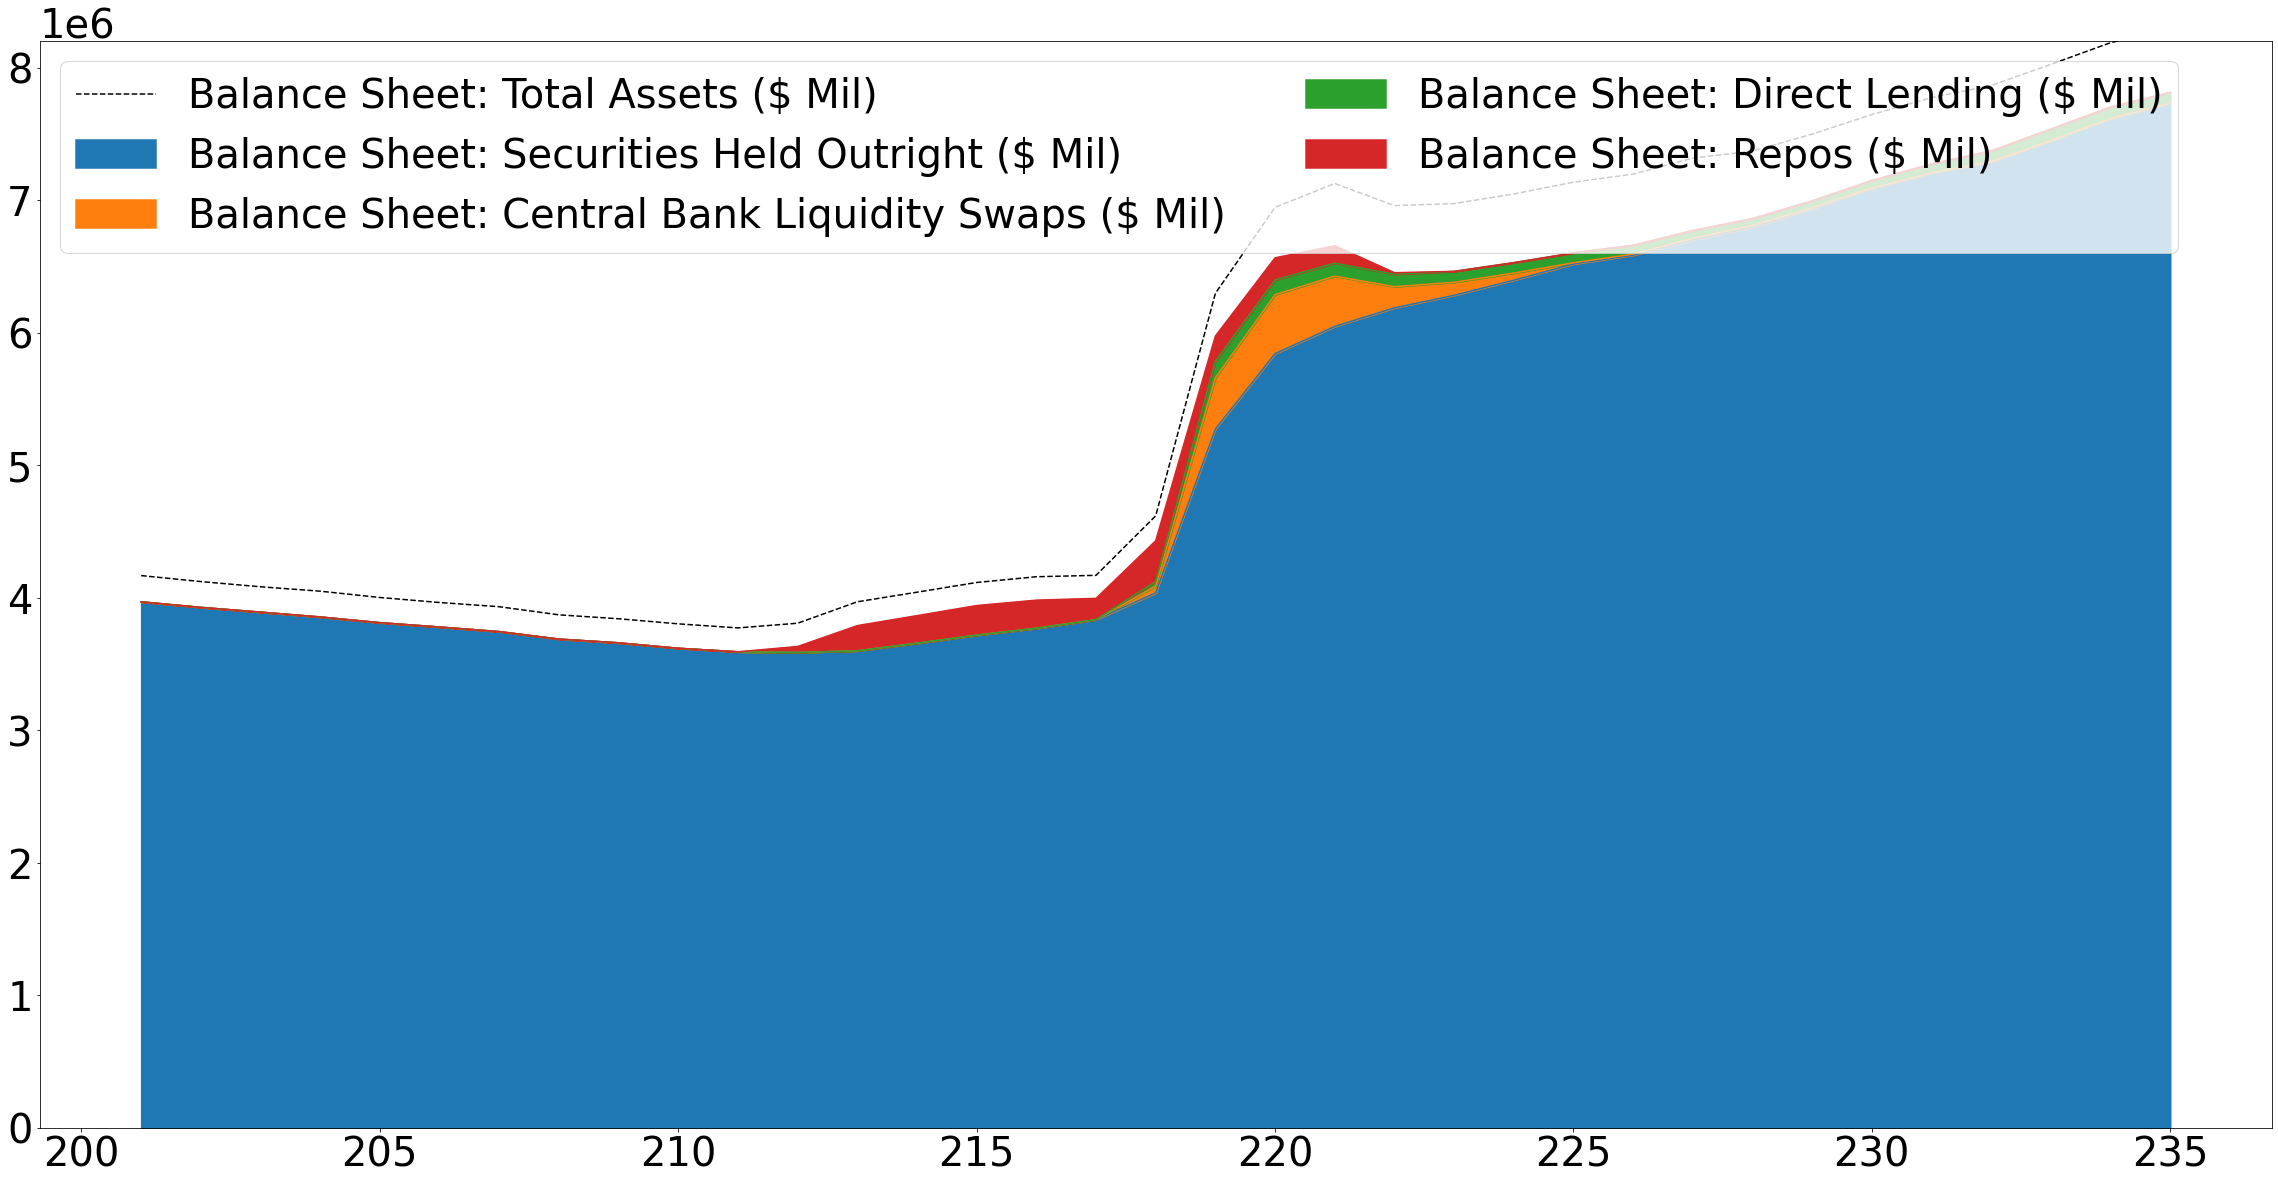

In [14]:
varAssets = [
    "Balance Sheet: Securities Held Outright ($ Mil)",
    "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
    "Balance Sheet: Direct Lending ($ Mil)",
    "Balance Sheet: Repos ($ Mil)"
]

plot_stacked_lines(
    data.loc["2002-12-31":], 
    varAssets, 
    lw = 1.5, 
    total_var = "Balance Sheet: Total Assets ($ Mil)"
)


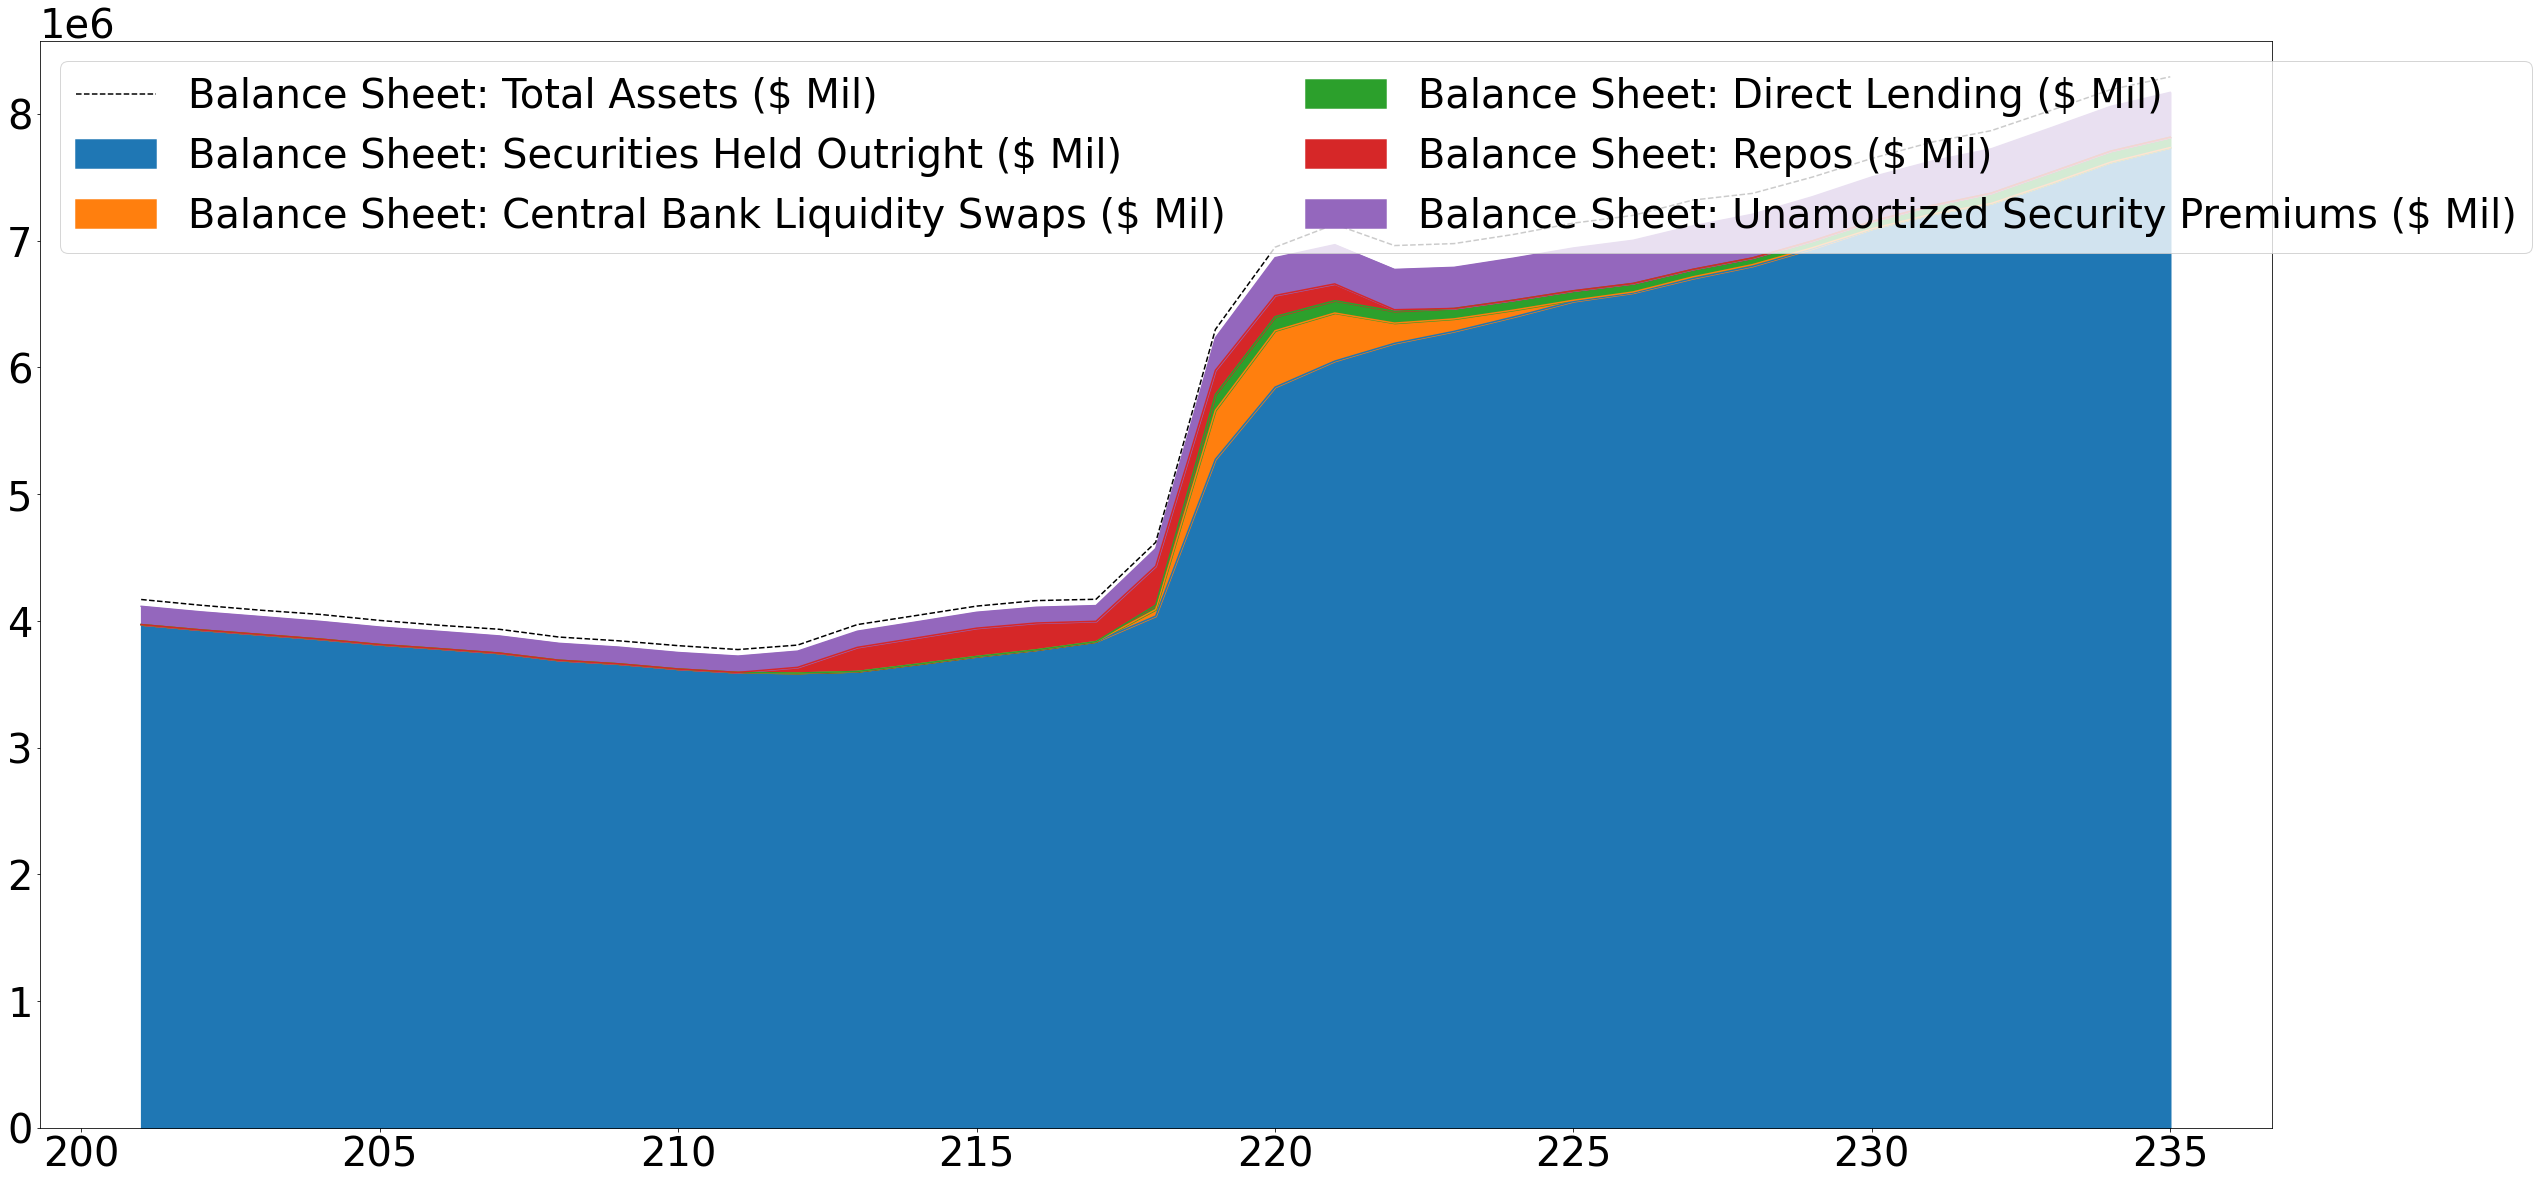

In [15]:
varAssets = [
    "Balance Sheet: Securities Held Outright ($ Mil)",
    "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
    "Balance Sheet: Direct Lending ($ Mil)",
    "Balance Sheet: Repos ($ Mil)",
    "Balance Sheet: Unamortized Security Premiums ($ Mil)"
]

plot_stacked_lines(
    data.loc["2002-12-31":], 
    varAssets, 
    lw = 1.5, 
    total_var = "Balance Sheet: Total Assets ($ Mil)"
)

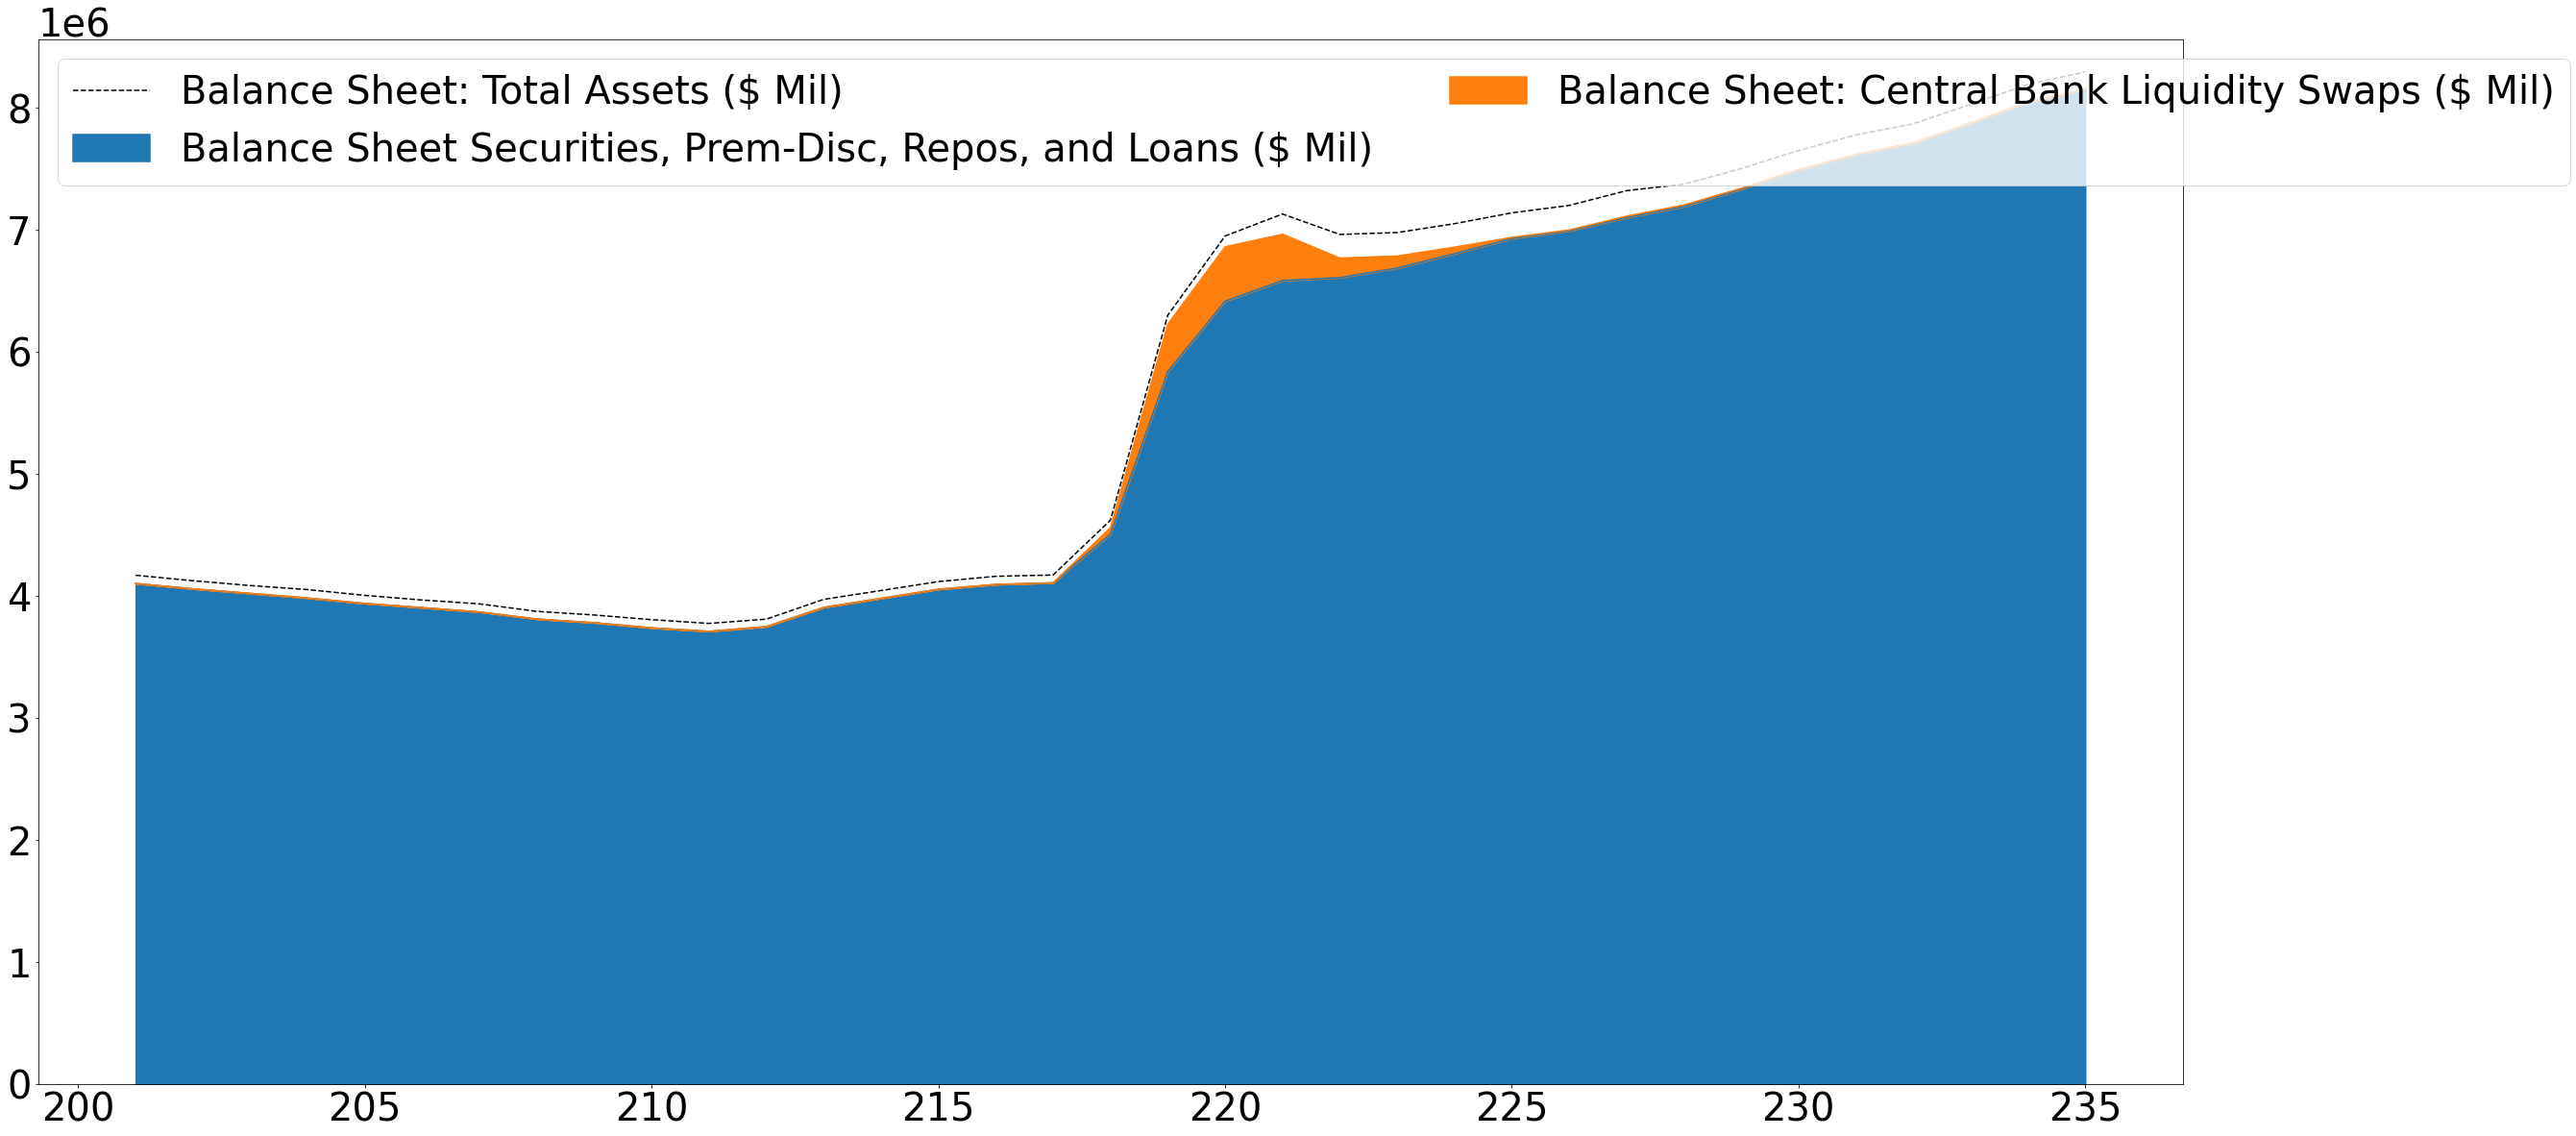

In [16]:
varAssets = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",
             "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(
    data.loc["2002-12-31":], 
    varAssets, 
    lw = 1.5, 
    total_var = "Balance Sheet: Total Assets ($ Mil)"
)

## Liabilities...

### Fed Deposits...

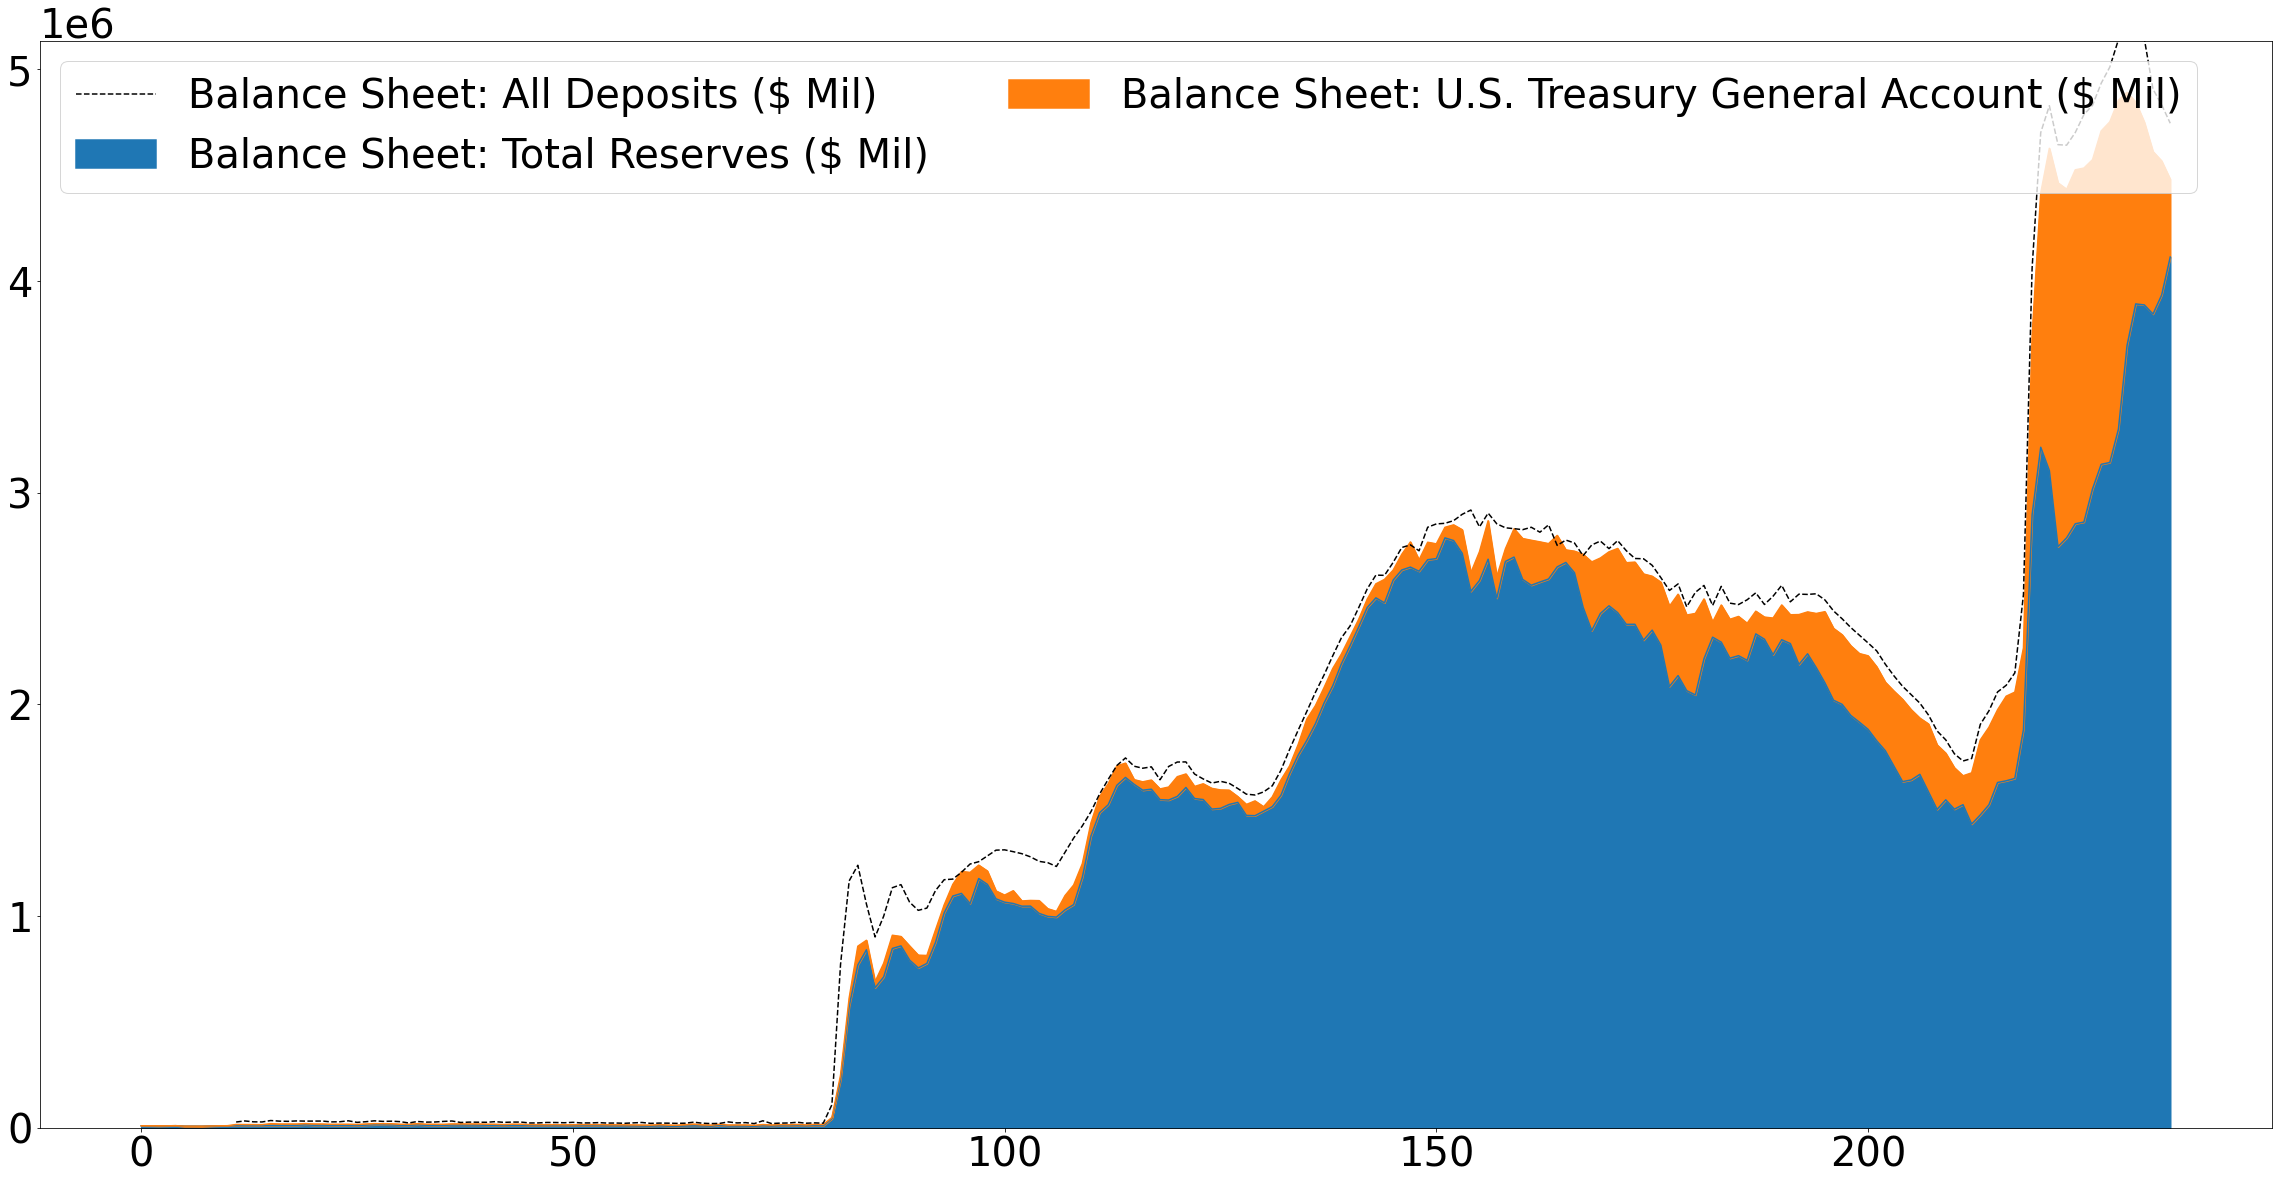

In [17]:
varAssets = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(
    data, 
    varAssets, 
    lw = 1.5, 
    total_var = "Balance Sheet: All Deposits ($ Mil)"
)

## Full balance sheet

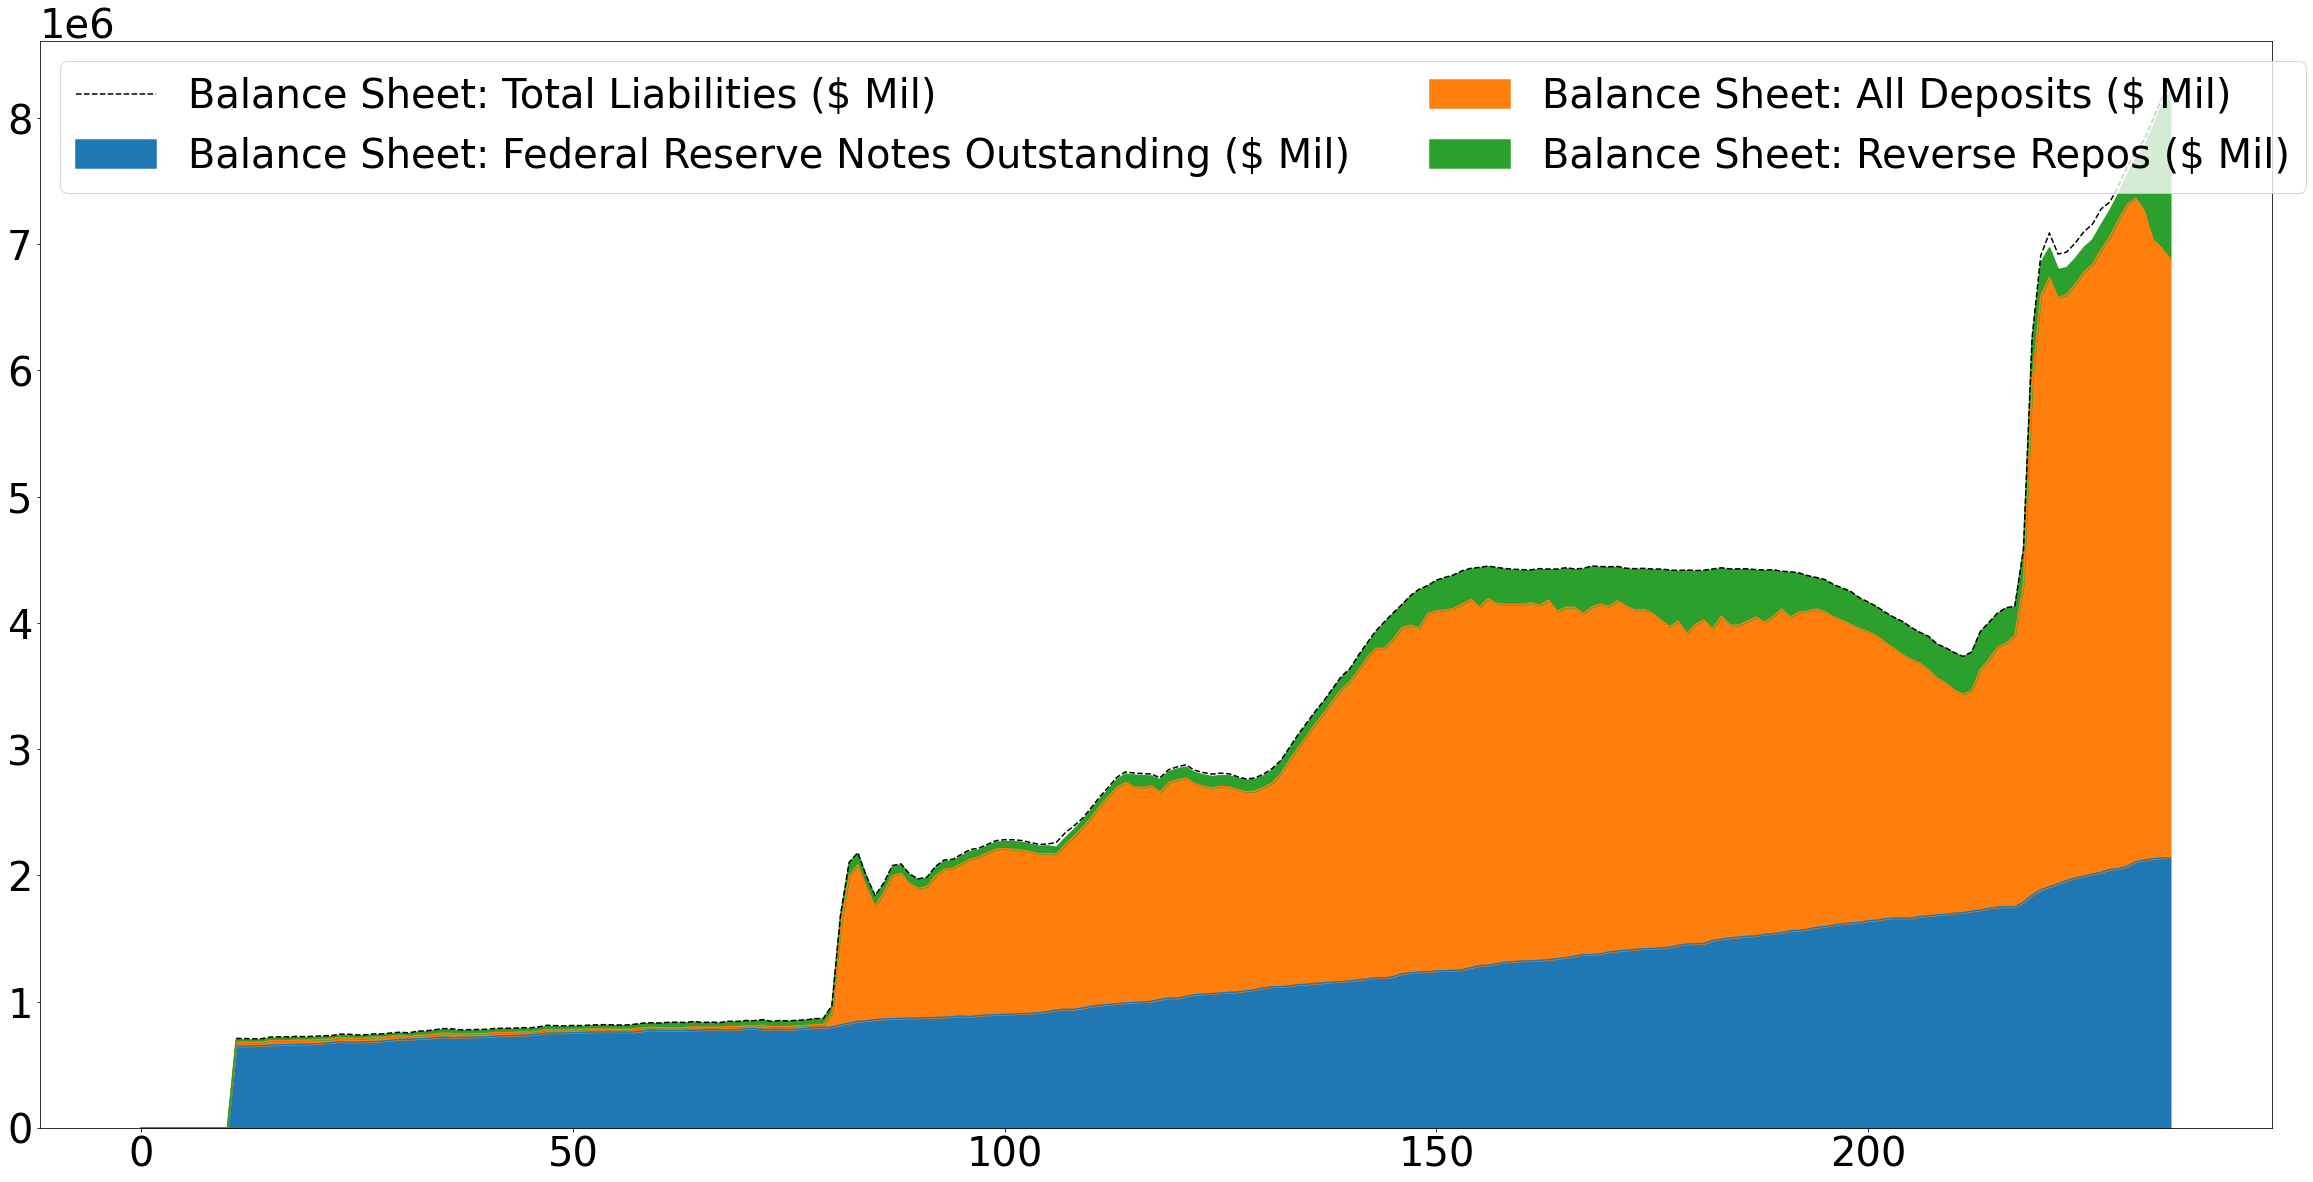

In [18]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(
    data, 
    account_vars, 
    lw = 1.5, 
    total_var = "Balance Sheet: Total Liabilities ($ Mil)"
)

## Overnight Lending Market


C:\Users\SAND8464\AppData\Local\Temp/ipykernel_9740/4055892860.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


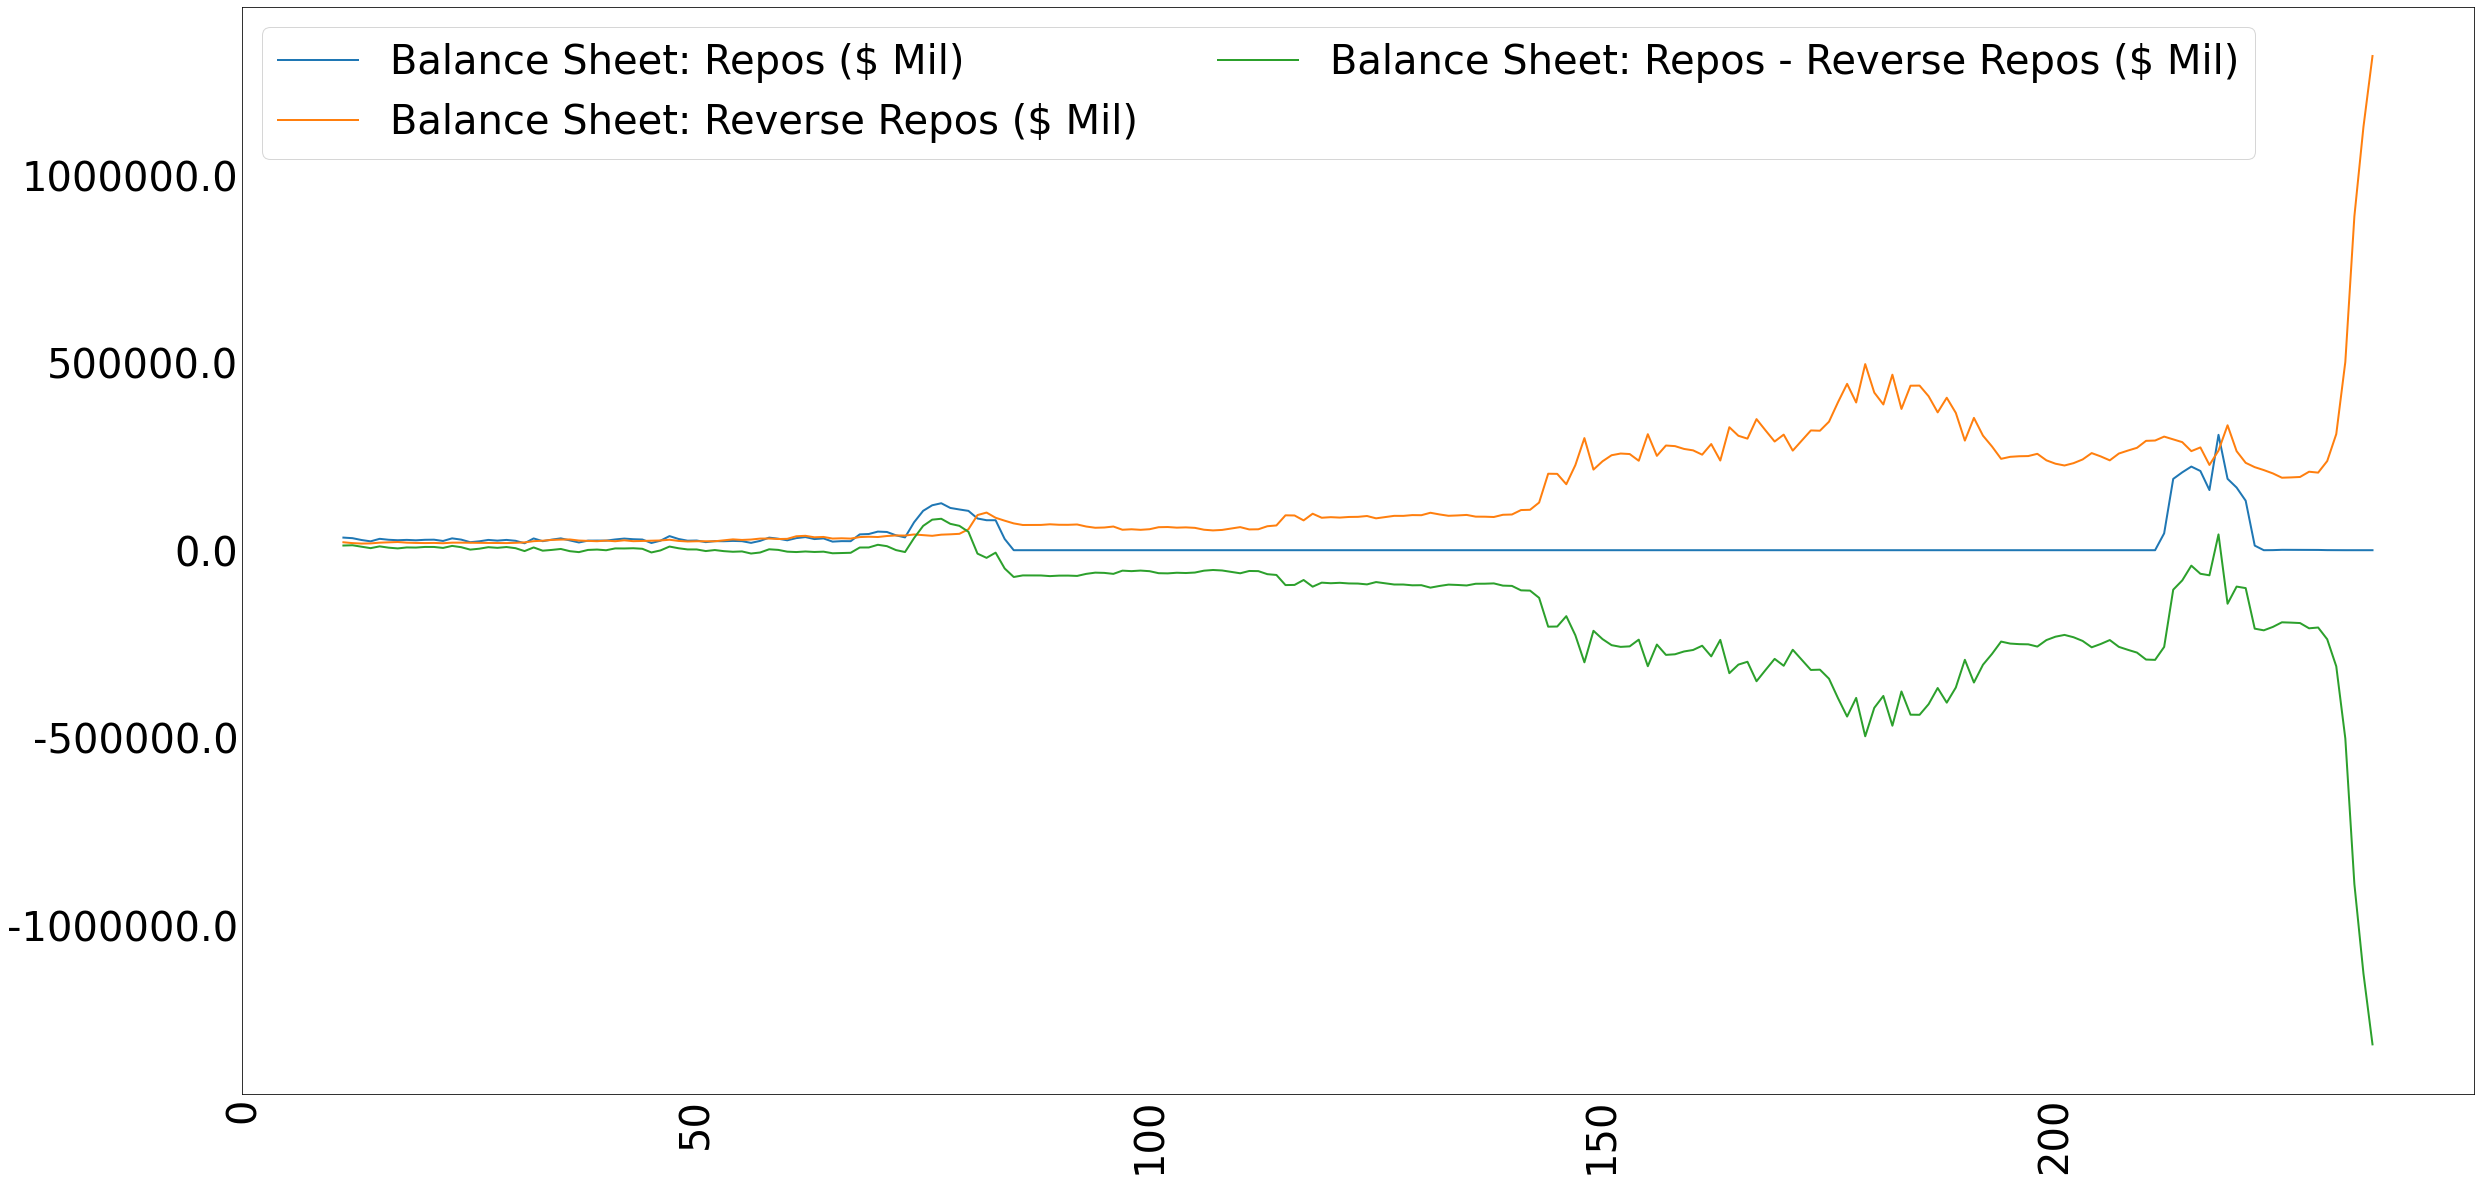

In [19]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(
    data[overnight_vars], 
    lw = 2
)

data[overnight_vars].to_csv("repoMarket.csv")



C:\Users\SAND8464\AppData\Local\Temp/ipykernel_9740/4055892860.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


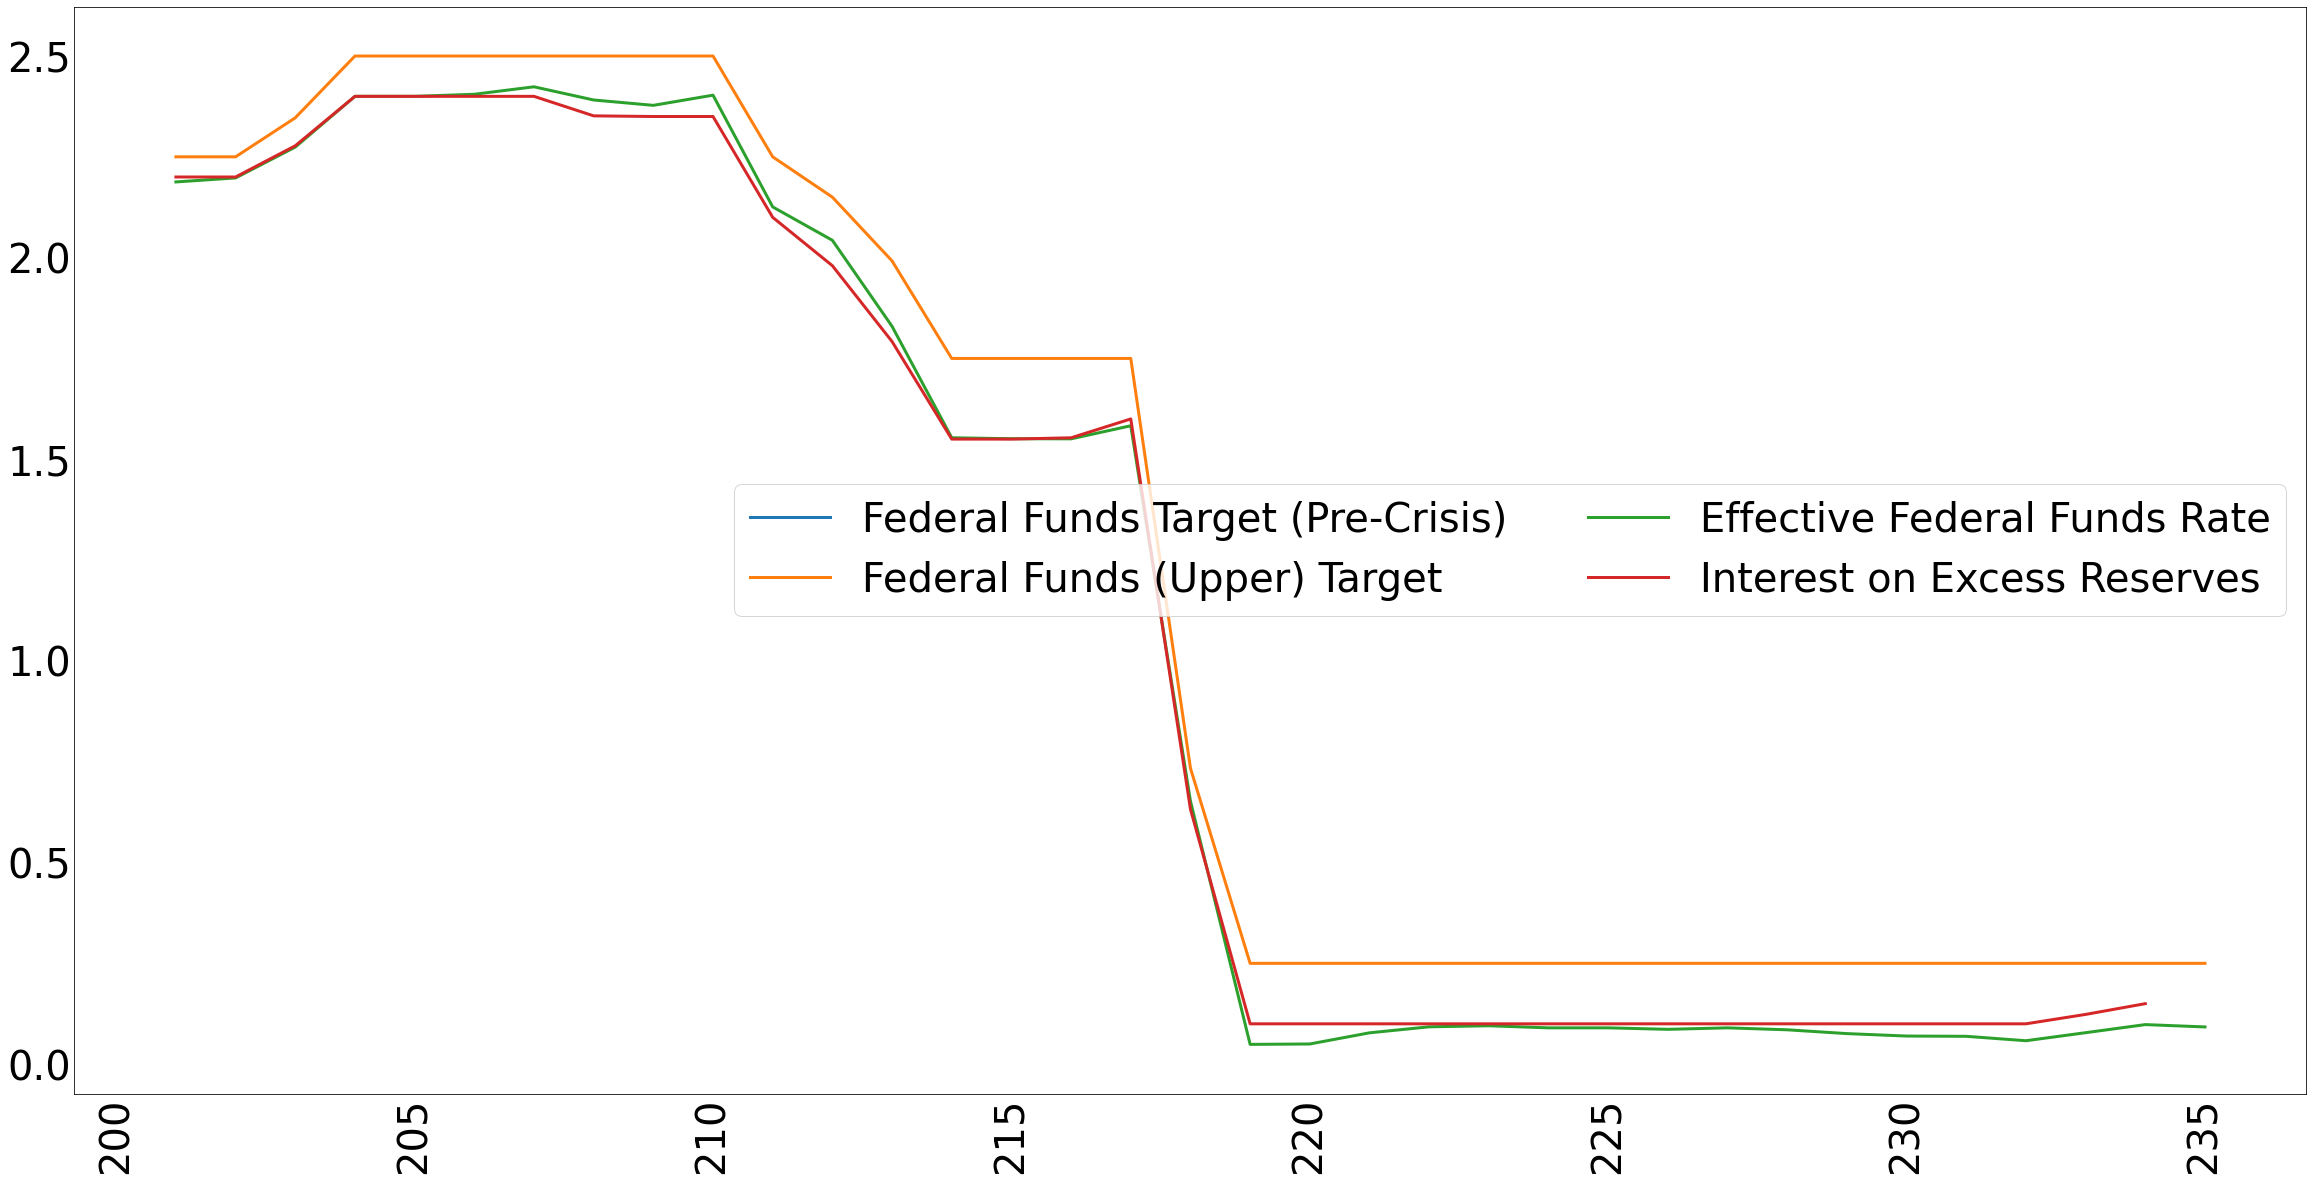

In [20]:
varInterest = ["Federal Funds Target (Pre-Crisis)",
               "Federal Funds (Upper) Target",
               "Effective Federal Funds Rate",
               "Interest on Excess Reserves"]

plot_lines(
    data.loc["2002":,varInterest], 
    lw = 3
)

In [21]:
# this is attempting to close the PDF
pp.close

NameError: name 'pp' is not defined